In [181]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
%matplotlib inline

# Тестовые данные #

Сначала поработаем с тестовыми данными. (Только на первом риде, т.к. сказали, что во втором баг)

В больших данных будет больше комментариев, тестовые использовались в качестве черновика.

## Задание 1 ##

In [182]:
r1 = "/home/prep/NGS/data/1/test.fastq"
parse1 = list(SeqIO.parse(r1, "fastq-illumina")) # парсим данные
gc1 = [] # сюда будем класть значения GC% для каждого нуклеотида

for rec in parse1:
    seq = rec.seq.replace('N', '') # нуклеотиды N не учитываем
    gc1.append(GC(seq)) # считаем GC

(array([1., 0., 0., 1., 0., 2., 2., 1., 1., 1.]),
 array([34.375     , 36.84659091, 39.31818182, 41.78977273, 44.26136364,
        46.73295455, 49.20454545, 51.67613636, 54.14772727, 56.61931818,
        59.09090909]),
 <BarContainer object of 10 artists>)

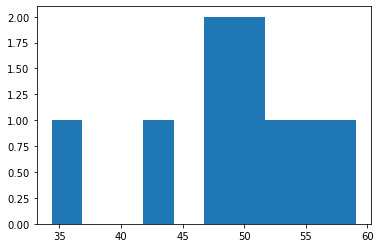

In [183]:
plt.hist(gc1)

## Задание 2 ##

In [184]:
import pandas as pd

Считаем распределение ошибок:

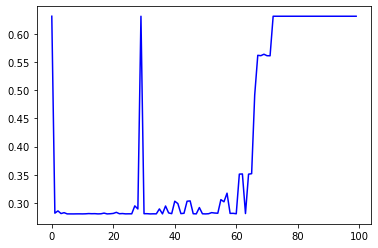

In [185]:
cnt = 0
long = 0
for rec in parse1:
    cnt += 1
    long = len(rec)
    if cnt == 1:
        break
        
arr = [0]*long # массив с длиной, равной длине рида
    
for rec in parse1:
    for i in range(long):
        q = rec.letter_annotations["phred_quality"][i] # оценку качества знаем
        p = 10**(-q/10) # используем формулу вероятности через оценку
        arr[i] += p

for i in range(long):
    arr[i] /= len(parse1) # поделим на число ридов суммарную вероятность - усредним
        
arr = pd.DataFrame(arr)
plt.plot(arr, color="blue")

Считаем качественную оценку (для сравнения с fastqc):

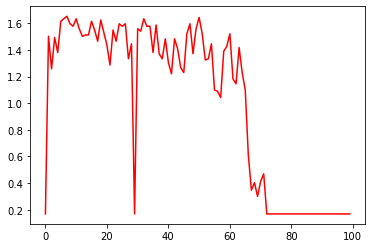

In [186]:
arr = [0]*long # массив с длиной, равной длине рида

for rec in parse1:
    for i in range(long):
        q = rec.letter_annotations["phred_quality"][i] # оценку качества знаем
        arr[i] += q

arr = arr/np.mean(arr) # усредним
        
arr = pd.DataFrame(arr)
plt.plot(arr, color="red")

## Задание 3 ##

![alt text](3_1.png "kek")

![alt text](3_2.png "kek")

## Вывод: ##

Тестовых данных недостаточно для полноценного анализа и сравнения результатов, хотя уже видно схожесть двух графиков (качественной оценки, посчитанной ручным способом и первым графиком fastqc). Переходим к большим данным, там же я поясню поподробнее, что мы считали.

# Большие данные #

## Задание 1 ##

### Первый рид ###

С помощью функции GC посчитаем GC-состав ридов, при этом нуклеотиды N учитывать не будем:

In [164]:
r1 = "/home/kolchina/frag.R1.fastq"
parse1 = list(SeqIO.parse(r1, "fastq-illumina")) # парсим данные
gc1 = []

for rec in parse1:
    seq = rec.seq.replace('N', '') # не учитываем N
    gc1.append(GC(seq)) # считаем GC

(array([3.00000e+01, 1.51000e+02, 7.47000e+02, 1.00280e+04, 5.93490e+04,
        4.81917e+05, 8.45835e+05, 3.05848e+05, 1.18630e+04, 4.14000e+02]),
 array([28.66666667, 35.6       , 42.53333333, 49.46666667, 56.4       ,
        63.33333333, 70.26666667, 77.2       , 84.13333333, 91.06666667,
        98.        ]),
 <BarContainer object of 10 artists>)

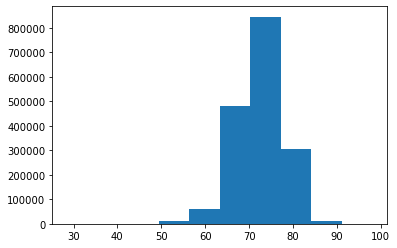

In [165]:
plt.hist(gc1)

Получили GC-распеделение. Видно из графика, что, к примеру, ридов с GC 70-80% очень много.

### Второй рид ###

In [166]:
r2 = "/home/kolchina/frag.R2.fastq"
parse2 = list(SeqIO.parse(r2, "fastq-illumina"))
gc2 = []

for rec in parse2:
    seq = rec.seq.replace('N', '')
    gc2.append(GC(seq)) # считаем GC

(array([3.00000e+00, 1.10000e+01, 4.50000e+01, 3.20000e+02, 4.62200e+03,
        5.34260e+04, 6.45270e+05, 8.90715e+05, 1.20007e+05, 1.76300e+03]),
 array([ 8.66666667, 17.66666667, 26.66666667, 35.66666667, 44.66666667,
        53.66666667, 62.66666667, 71.66666667, 80.66666667, 89.66666667,
        98.66666667]),
 <BarContainer object of 10 artists>)

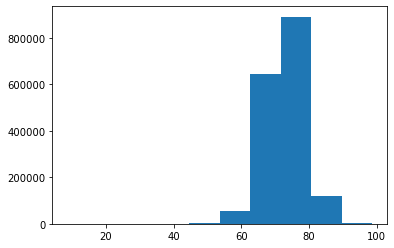

In [167]:
plt.hist(gc2)

Пик GC распределения приходится на 60-80%.

## Задание 2 ##

In [170]:
import pandas as pd

In [171]:
cnt = 0
long = 0
for rec in parse1:
    cnt += 1
    long = len(rec)
    if cnt == 1:
        break
print(long) # посчитали длину рида

150


Решим задачу двумя способами.

**1 способ:**
Посчитаем вероятности ошибок для каждого нуклеотида, используя формулу $P=10^{-\frac{Q}{10}}$. $Q$ нам известно для каждого нуклеотида в риде.

### Первый рид ###

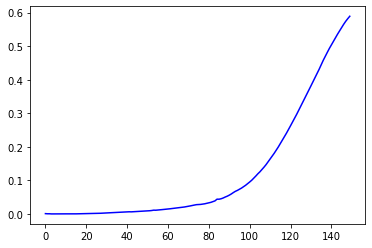

In [172]:
arr = [0]*long # массив с длиной, равной длине рида

for rec in parse1:
    for i in range(long):
        q = rec.letter_annotations["phred_quality"][i] # оценку качества знаем
        p = 10**(-q/10) # используем формулу вероятности через оценку
        arr[i] += p

for i in range(long):
    arr[i] /= len(parse1) # поделим на число ридов суммарную вероятность - усредним
        
arr = pd.DataFrame(arr)
plt.plot(arr, color="blue")

### Второй рид ###

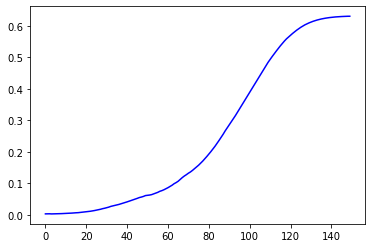

In [174]:
arr = [0]*long # массив с длиной, равной длине рида

for rec in parse2:
    for i in range(long):
        q = rec.letter_annotations["phred_quality"][i]
        p = 10**(-q/10)
        arr[i] += p

for i in range(long):
    arr[i] /= len(parse2)
        
arr = pd.DataFrame(arr)
plt.plot(arr, color="blue")

**Вывод:** Графики получились правдоподобными, поскольку, как мы знаем, из-за особенностей работы Иллюмины ошибка возрастает ближе к концу рида, на последних нуклеотидах.

**2 способ:** Посчитаем качественную оценку для каждого нуклеотида (это нам понадобится для сравнения с работой fastqc).

### Первый рид ###

In [178]:
import numpy as np

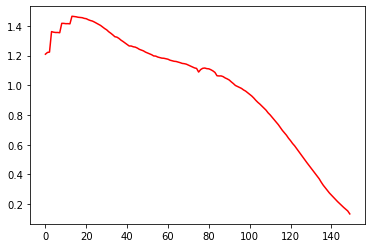

In [179]:
arr = [0]*long # массив с длиной, равной длине рида

for rec in parse1:
    for i in range(long):
        q = rec.letter_annotations["phred_quality"][i] # оценку качества знаем
        arr[i] += q

arr = arr/np.mean(arr) # усредним
        
arr = pd.DataFrame(arr)
plt.plot(arr, color="red")

### Второй рид ###

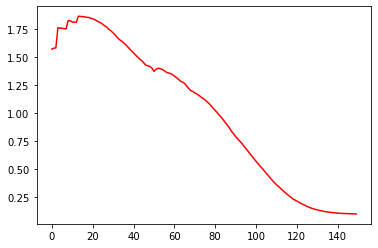

In [180]:
arr = [0]*long # массив с длиной, равной длине рида

for rec in parse2:
    for i in range(long):
        q = rec.letter_annotations["phred_quality"][i] # оценку качества знаем
        arr[i] += q

arr = arr/np.mean(arr) # усредним
        
arr = pd.DataFrame(arr)
plt.plot(arr, color="red")

Качество падает ближе к концу рида - опять же для Иллюмины это логично.

## Задание 3 ##

![alt text](111.png)

![alt text](112.png)

![alt text](211.png)

![alt text](212.png)

## Вывод: ##

Графики, показывающие качественную оценку нуклеотидов, почти идентичны тем, которые были получены программой fastqc; а также GC распределение, посчитанное ручным способом, совпадает с распределением, выданным fastqc, что подтверждает достоверность проделанной работы. Интересный результат: распределение GC напомнинает Гауссовское распределение.